# Programming Project #1: Hybrid Images

## CS445: Computational Photography

### Part I: Hybrid Images

In [1]:
# # Optional, if using Google Colab w/ Drive
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)
import os
import utils

# Change to your desired directory
os.chdir('pictures/')

# Verify the current working directory
print("Current Working Directory:", os.getcwd())

Current Working Directory: /Users/helenwu/Desktop/cs445MP/MP1_Hybrid_Images/haiyuew2_proj/pictures


In [2]:
import cv2

import numpy as np
from matplotlib.colors import LogNorm
from scipy import signal

# # modify to where you store your project data including utils.py
# datadir = "/Users/helenwu/Desktop/CS445/hybrid_4/" 

# utilfn = datadir + "utils.py"
# !cp "$utilfn" .


In [3]:
# switch from notebook to inline if using colab or otherwise cannot use interactive display)
# %matplotlib notebook  
# %matplotlib ipympl
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:


def hybridImage(im1, im2, sigma_low, sigma_high, gray_scale=True):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        sigma_low: standard deviation for the low-pass filter
        sigma_high: standard deviation for the high-pass filter
        
    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    '''  

    # Compute Gaussian kernels
    ksize_low = int(np.ceil(sigma_low) * 6 + 1)
    fil_low = cv2.getGaussianKernel(ksize_low, sigma_low)
    kernel_low = fil_low @ fil_low.T  # Outer product for 2D kernel

    ksize_high = int(np.ceil(sigma_high) * 6 + 1)
    fil_high = cv2.getGaussianKernel(ksize_high, sigma_high)
    kernel_high = fil_high @ fil_high.T  # Outer product for 2D kernel

    # Apply low-pass filter to the first image
    low_pass_im1 = cv2.filter2D(im1, -1, kernel_low)

    # Apply high-pass filter to the second image
    low_pass_im2 = cv2.filter2D(im2, -1, kernel_high)
    high_pass_im2 = im2 - low_pass_im2  # High-pass component

    # Combine low-pass and high-pass filtered images
    hybrid_image = (low_pass_im1 + high_pass_im2)/2


    fig, axes0 = plt.subplots(1, 2, figsize=(10, 5))
    axes0[0].imshow(low_pass_im1, cmap = "gray")
    axes0[0].set_title('Filtered Image 1 (Low Pass)')
    axes0[0].set_xticks([]), axes0[0].set_yticks([])

    axes0[1].imshow(high_pass_im2, cmap = "gray")
    axes0[1].set_title('Filtered Image 2 (High Pass)')
    axes0[1].set_xticks([]), axes0[1].set_yticks([])

    # Plot FFTs before filtering
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im1)))))
    axes[0].set_title('FFT of Image 1')
    axes[0].set_xticks([]), axes[0].set_yticks([])

    axes[1].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im2)))))
    axes[1].set_title('FFT of Image 2')
    axes[1].set_xticks([]), axes[1].set_yticks([])

    # Plot FFTs after filtering
    fig, axes2 = plt.subplots(1, 2, figsize=(10, 5))
    axes2[0].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(low_pass_im1)))))
    axes2[0].set_title('FFT of Filtered Image 1')
    axes2[0].set_xticks([]), axes2[0].set_yticks([])

    axes2[1].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(high_pass_im2)))))
    axes2[1].set_title('FFT of Filtered Image 2')
    axes2[1].set_xticks([]), axes2[1].set_yticks([])

    plt.show()

    return hybrid_image


In [5]:
my_im1_file = 'img.jpg'
my_im2_file = 'Bob_Happy.jpg'
my_im1 = np.float32(cv2.imread(my_im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
my_im2 = np.float32(cv2.imread(my_im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)

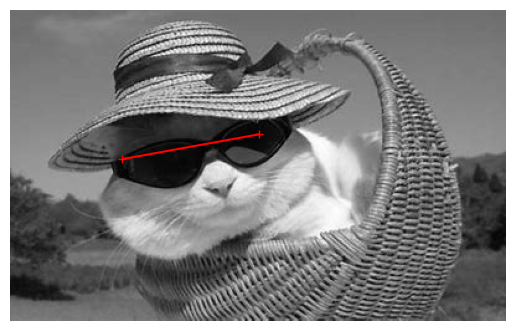

In [6]:
my_pts_im1 = utils.prompt_eye_selection(my_im1)
my_pts_im1 = np.array([[200, 100], [90, 120]]) # uncomment if entering [x, y] pts manually
plt.plot(my_pts_im1[:,0], my_pts_im1[:,1], 'r-+')


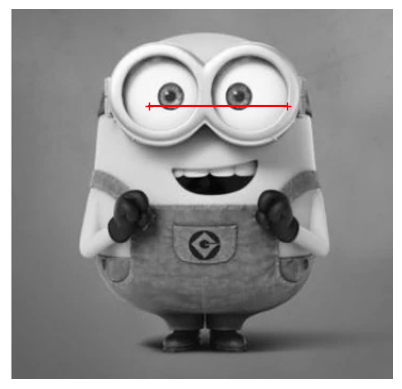

In [7]:
my_pts_im2 = utils.prompt_eye_selection(my_im2)
my_pts_im2 = np.array( [[260,90],[130,90]]) # uncomment if entering [x, y] pts manually
plt.plot(my_pts_im2[:,0], my_pts_im2[:,1], 'r-+')

In [8]:
my_im1, my_im2 = utils.align_images(my_im1_file, my_im2_file,my_pts_im1,my_pts_im2,save_images=False)


In [9]:
# convert to grayscale
my_im1 = cv2.cvtColor(my_im1, cv2.COLOR_BGR2GRAY) / 255.0
my_im2 = cv2.cvtColor(my_im2, cv2.COLOR_BGR2GRAY) / 255.0

(Text(0.5, 1.0, 'Image 2'), [], [])

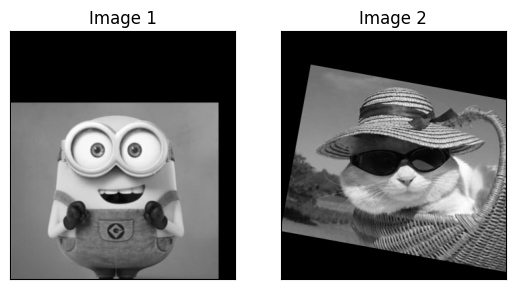

In [10]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(my_im2, cmap="gray")
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(my_im1, cmap="gray")
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([])

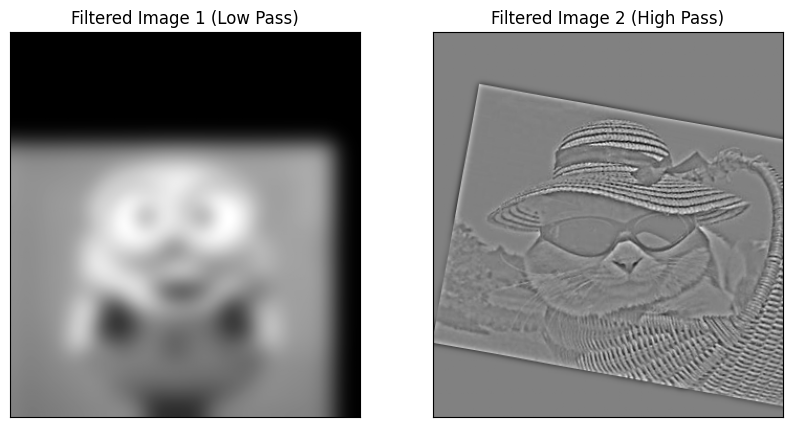

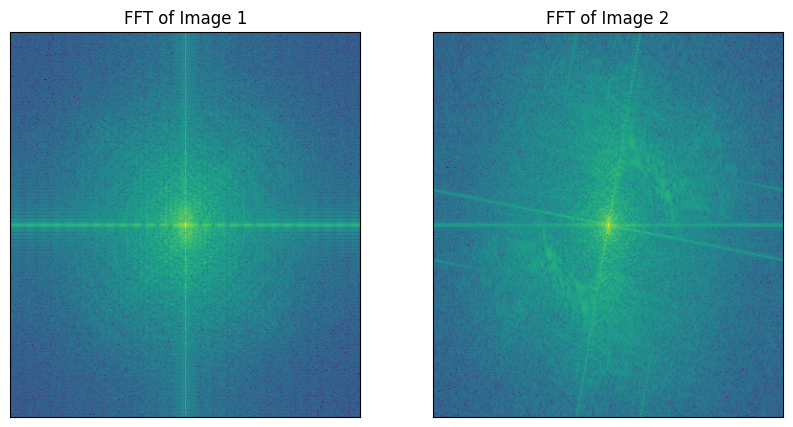

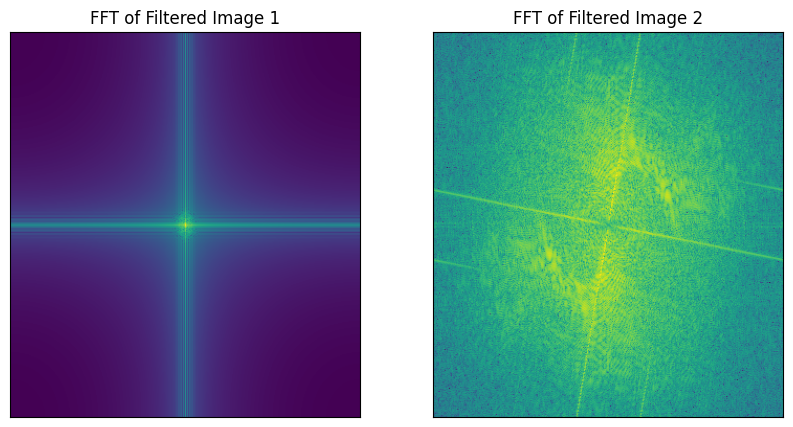

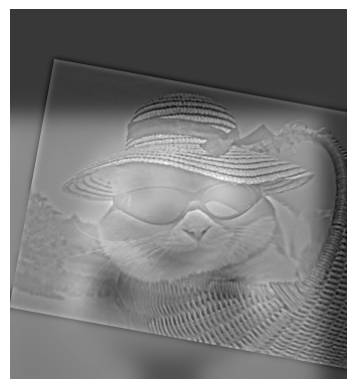

In [11]:
im_hybrid = hybridImage(my_im2,my_im1, 10 , 3)
cropped_object = utils.interactive_crop(im_hybrid)

In [12]:
my_im1_file = 'horse.jpg'
my_im2_file = 'horse2.jpg'
my_im1 = np.float32(cv2.imread(my_im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
my_im2 = np.float32(cv2.imread(my_im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)

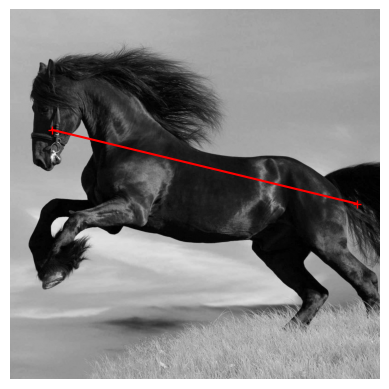

In [13]:
my_pts_im1 = utils.prompt_eye_selection(my_im1)
my_pts_im1 = np.array([[90, 260], [750, 420]]) # uncomment if entering [x, y] pts manually
plt.plot(my_pts_im1[:,0], my_pts_im1[:,1], 'r-+')


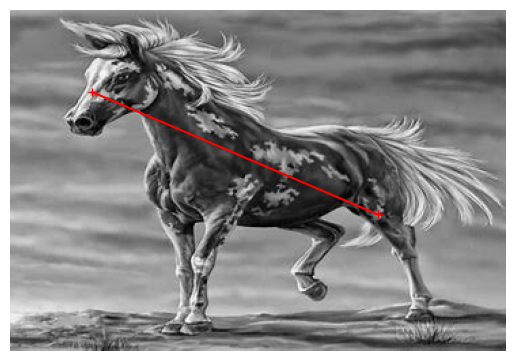

In [14]:
my_pts_im2 = utils.prompt_eye_selection(my_im2)
my_pts_im2 = np.array( [[60,60],[270,150]]) # uncomment if entering [x, y] pts manually
plt.plot(my_pts_im2[:,0], my_pts_im2[:,1], 'r-+')

(Text(0.5, 1.0, 'Image 2'), [], [])

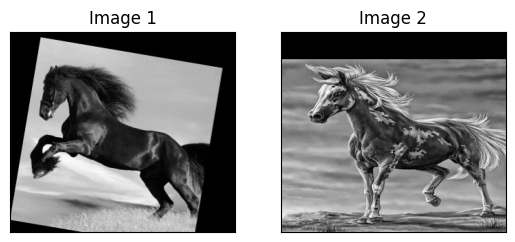

In [15]:
my_im1, my_im2 = utils.align_images(my_im1_file,my_im2_file ,my_pts_im1,my_pts_im2,save_images=False)
# convert to grayscale
my_im1 = cv2.cvtColor(my_im1, cv2.COLOR_BGR2GRAY) / 255.0
my_im2 = cv2.cvtColor(my_im2, cv2.COLOR_BGR2GRAY) / 255.0
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(my_im1, cmap="gray")
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(my_im2, cmap="gray")
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([])


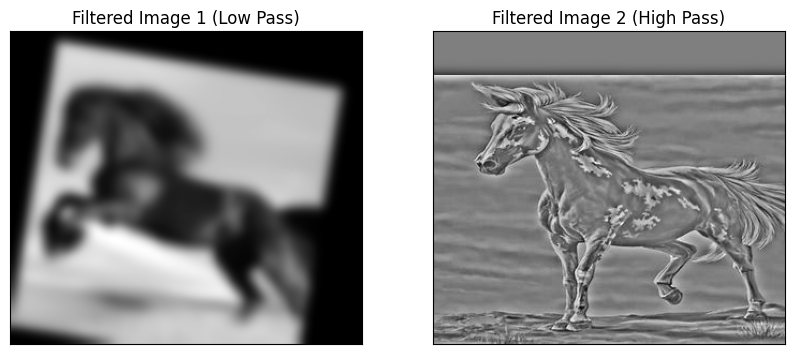

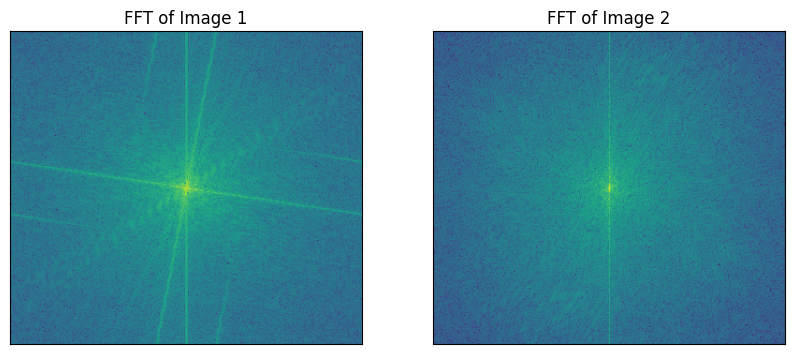

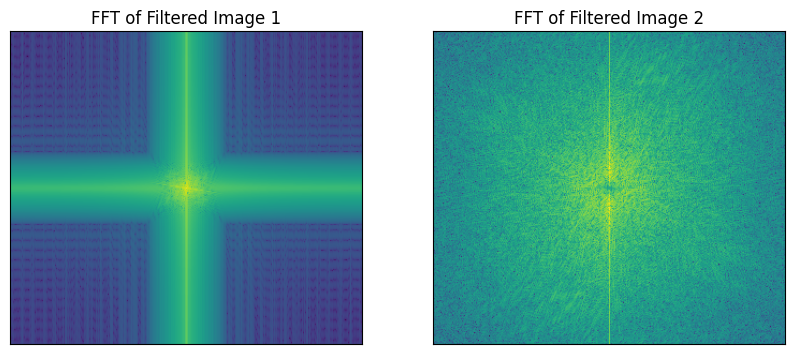

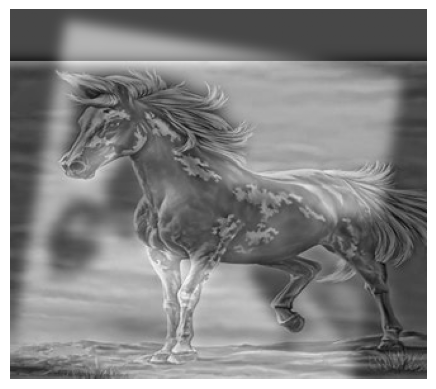

In [16]:
main_hybrid = hybridImage(my_im1, my_im2, 5, 5)
cropped_object = utils.interactive_crop(main_hybrid)

Text(0.5, 1.0, 'FFT of Hybrid Image')

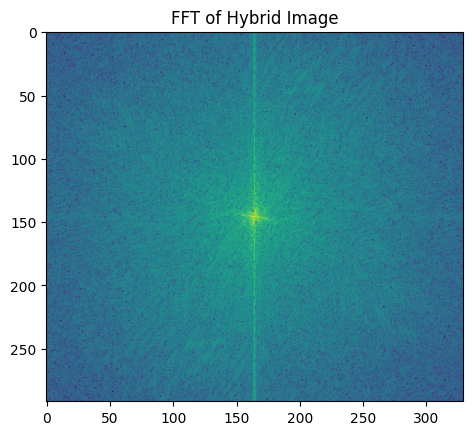

In [17]:
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(main_hybrid)))))
plt.title("FFT of Hybrid Image") 

In [18]:
my_im1_file = 'cat.jpg'
my_im2_file = 'lion.jpg'
my_im1 = np.float32(cv2.imread(my_im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
my_im2 = np.float32(cv2.imread(my_im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)

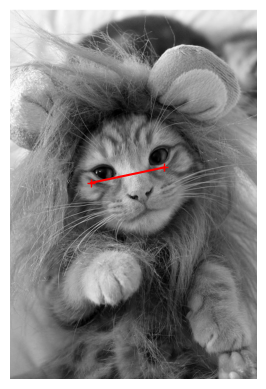

In [19]:
my_pts_im1 = utils.prompt_eye_selection(my_im1)
my_pts_im1 = np.array([[210, 450], [400, 410]]) # uncomment if entering [x, y] pts manually
plt.plot(my_pts_im1[:,0], my_pts_im1[:,1], 'r-+')


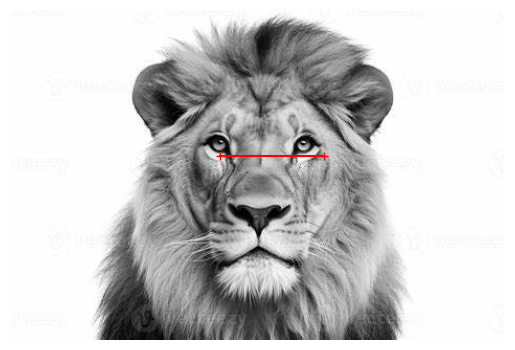

In [20]:
my_pts_im2 = utils.prompt_eye_selection(my_im2)
my_pts_im2 = np.array( [[200,140],[300,140]]) # uncomment if entering [x, y] pts manually
plt.plot(my_pts_im2[:,0], my_pts_im2[:,1], 'r-+')

In [21]:
my_im1, my_im2 = utils.align_images(my_im1_file, my_im2_file,my_pts_im1,my_pts_im2,save_images=False)
# convert to grayscale
my_im1 = cv2.cvtColor(my_im1, cv2.COLOR_BGR2GRAY) / 255.0
my_im2 = cv2.cvtColor(my_im2, cv2.COLOR_BGR2GRAY) / 255.0

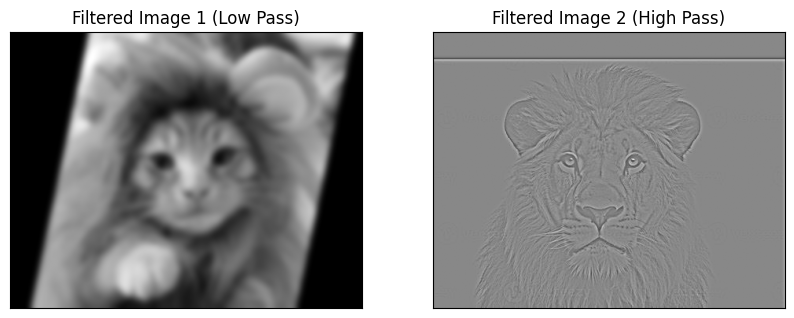

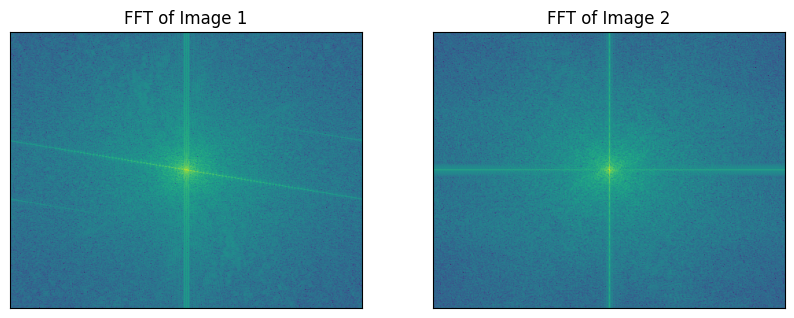

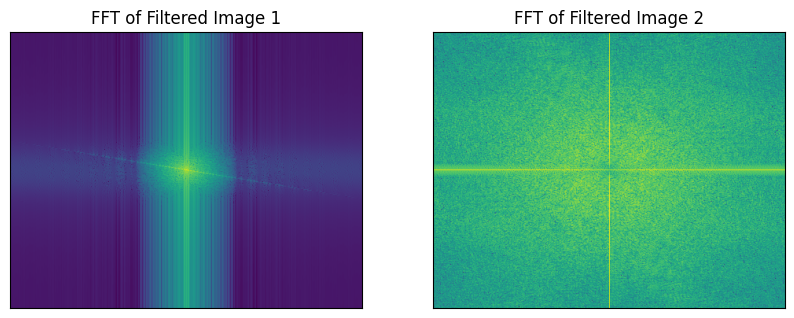

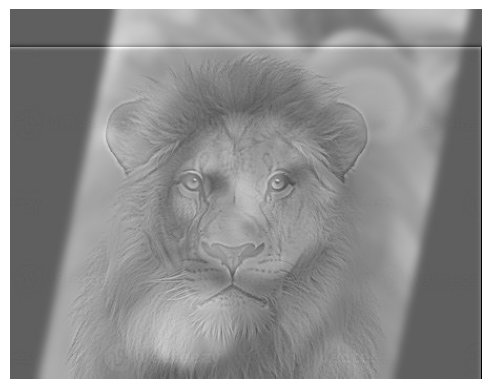

In [22]:
add_hybrid = hybridImage(my_im1, my_im2,4, 2)
cropped_object = utils.interactive_crop(add_hybrid)

### Part II: Image Enhancement

##### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

#### Contrast enhancement

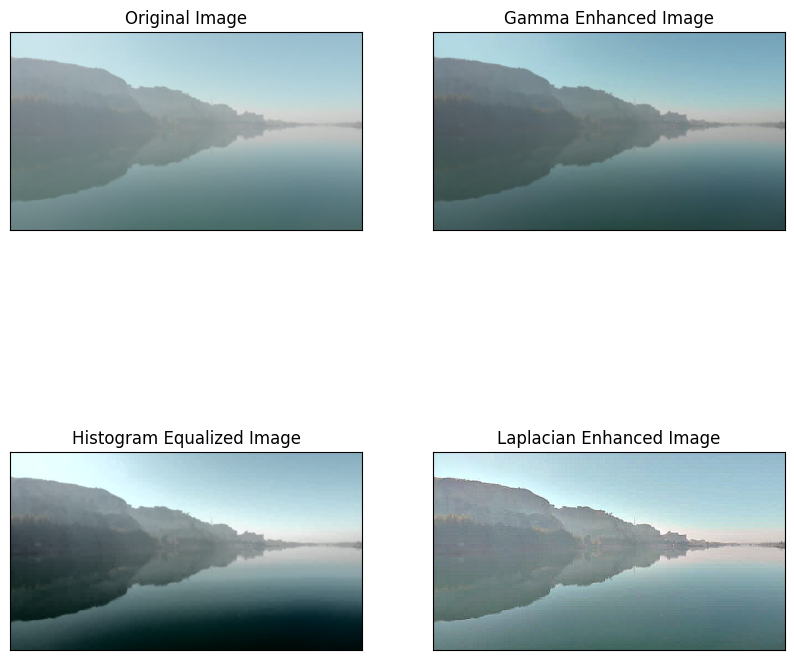

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def enhance_color_gamma(image, gamma=1.5):
    # inv_gamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** gamma * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

def enhance_color_histogram(image):
    ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    y, cr, cb = cv2.split(ycrcb)
    y = cv2.equalizeHist(y)
    enhanced_image = cv2.merge((y, cr, cb))
    return cv2.cvtColor(enhanced_image, cv2.COLOR_YCrCb2BGR)


def enhance_contrast_combined(image, sigma_high = 30):
    image = image.astype(np.float64)
    
    ksize2 = int(np.ceil(sigma_high) * 6 + 1)
    fil2 = cv2.getGaussianKernel(ksize2, sigma_high)
    kernel_high = fil2 @ np.transpose(fil2)
    
    low_pass_im2 = cv2.filter2D(image, -1, kernel_high)
    high_pass_im2 = image - low_pass_im2
    
    laplacian = cv2.Laplacian(image, cv2.CV_64F, ksize=3)
    enhanced_image = np.clip(image - 0.5 * laplacian + high_pass_im2, 0, 255).astype(np.uint8)
    
    return enhanced_image






image_path = "low_contrast2.jpg"
image = cv2.imread(image_path)

color_enhanced_gamma = enhance_color_gamma(image)
color_enhanced_histogram = enhance_color_histogram(image)
contrast_enhanced_laplacian = enhance_contrast_combined(image)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Image')
axes[0, 0].set_xticks([]), axes[0, 0].set_yticks([])

axes[0, 1].imshow(cv2.cvtColor(color_enhanced_gamma, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title('Gamma Enhanced Image')
axes[0, 1].set_xticks([]), axes[0, 1].set_yticks([])

axes[1, 0].imshow(cv2.cvtColor(color_enhanced_histogram, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Histogram Equalized Image')
axes[1, 0].set_xticks([]), axes[1, 0].set_yticks([])

axes[1, 1].imshow(cv2.cvtColor(contrast_enhanced_laplacian, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('Laplacian Enhanced Image')
axes[1, 1].set_xticks([]), axes[1, 1].set_yticks([])


plt.show()


#### Color enhancement 

In [24]:
def enhance_saturation(image, scale=1.5):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV).astype(np.float32)
    h, s, v = cv2.split(hsv)
    s = np.clip((s / 255.0) ** 0.3 * 255, 0, 255)
    enhanced_hsv = cv2.merge((h, s, v)).astype(np.uint8)
    return cv2.cvtColor(enhanced_hsv, cv2.COLOR_HSV2BGR)

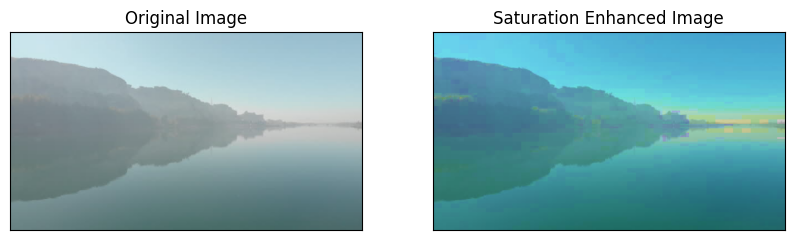

In [25]:

saturation_enhanced = enhance_saturation(image)

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].set_xticks([]), axes[ 0].set_yticks([])

axes[1].imshow(cv2.cvtColor(saturation_enhanced, cv2.COLOR_BGR2RGB))
axes[1].set_title('Saturation Enhanced Image')
axes[1].set_xticks([]), axes[1].set_yticks([])


plt.show()


#### Color shift

In [26]:
def shift_color_lab(image, scaler_a=1, scaler_b=1):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB).astype(np.int16)
    l, a, b = cv2.split(lab)
    a[a > 128] = np.clip(a[a > 128] * scaler_a, 0, 255)
    b[b>128] = np.clip(b[b > 128] * scaler_b, 0, 255)
    shifted_lab = cv2.merge((l, a, b)).astype(np.uint8)
    return cv2.cvtColor(shifted_lab, cv2.COLOR_LAB2BGR)

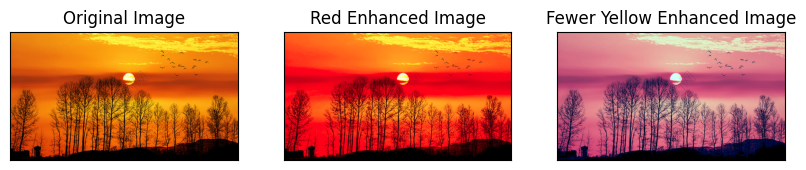

In [27]:
image_path = "scenery.jpg"
image = cv2.imread(image_path)
red_shifted = shift_color_lab(image, scaler_a= 1.2)
less_yellow_shifted = shift_color_lab(image, scaler_b = 0.7)

fig, axes = plt.subplots(1, 3, figsize=(10, 10))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].set_xticks([]), axes[ 0].set_yticks([])

axes[1].imshow(cv2.cvtColor(red_shifted, cv2.COLOR_BGR2RGB))
axes[1].set_title('Red Enhanced Image')
axes[1].set_xticks([]), axes[1].set_yticks([])

axes[2].imshow(cv2.cvtColor(less_yellow_shifted, cv2.COLOR_BGR2RGB))
axes[2].set_title('Fewer Yellow Enhanced Image')
axes[2].set_xticks([]), axes[2].set_yticks([])

plt.show()


Bells & Whistles 1.

In [28]:
my_im1_file = 'horse.jpg'
my_im2_file = 'horse2.jpg'
image1 = cv2.imread(my_im1_file)
image2 = cv2.imread(my_im2_file)
my_pts_im1 = np.array([[90, 260], [750, 420]]) 
my_pts_im2 = np.array( [[60,60],[270,150]])
image1, image2 = utils.align_images(my_im1_file, my_im2_file,my_pts_im1,my_pts_im2,save_images=False)


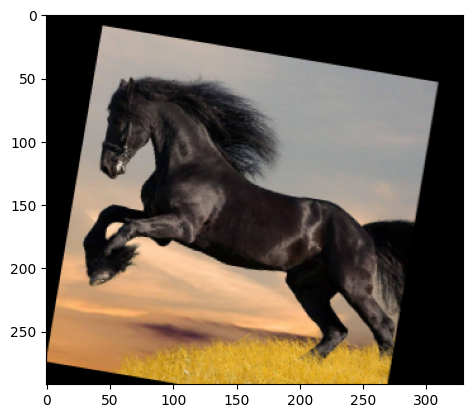

In [29]:
plt.imshow(image1[:, :, [2,1,0]]) 

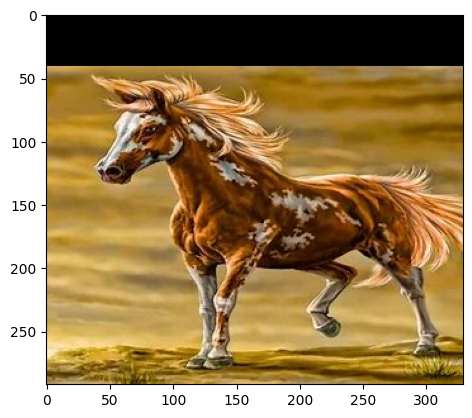

In [30]:
plt.imshow(image2[:, :, [2,1,0]]) 


In [31]:
sigma_high = 5
sigma_low =5

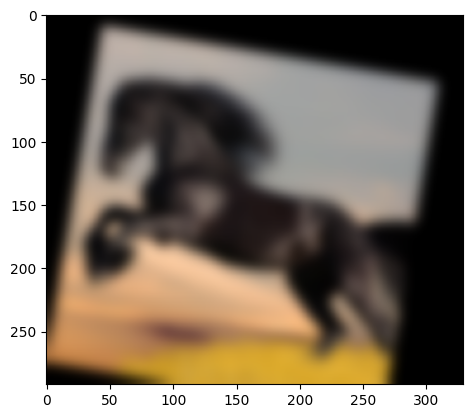

In [32]:
image1 = image1.astype(np.float64)
ksize1 = int(np.ceil(sigma_high) * 6 + 1)

# Create 1D Gaussian kernel
fil1 = cv2.getGaussianKernel(ksize1, sigma_high)

# Create 2D Gaussian kernel by multiplying the 1D kernel with its transpose
kernel_high = fil1 @ np.transpose(fil1)

# Apply low-pass filter (Gaussian smoothing)
low_pass_im1 = cv2.filter2D(image1, -1, kernel_high)

# low_pass_im1
low_pass_im1_uint8 = np.clip(low_pass_im1, 0, 255).astype(np.uint8)

plt.imshow(low_pass_im1_uint8[:, :, [2,1,0]]) 


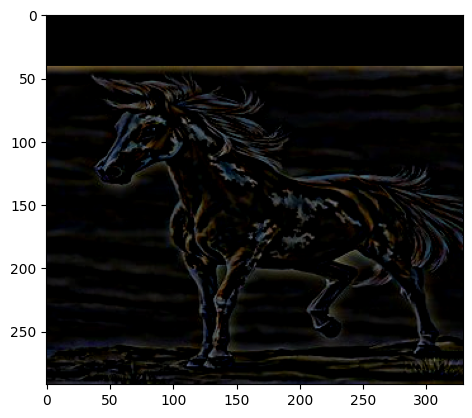

In [33]:
image2 = image2.astype(np.float64)

# Calculate kernel size for Gaussian filter
ksize2 = int(np.ceil(sigma_high) * 6 + 1)

# Create 1D Gaussian kernel
fil2 = cv2.getGaussianKernel(ksize2, sigma_high)

# Create 2D Gaussian kernel by multiplying the 1D kernel with its transpose
kernel_high = fil2 @ np.transpose(fil2)

# Apply low-pass filter (Gaussian smoothing)
low_pass_im2 = cv2.filter2D(image2, -1, kernel_high)

# High-pass filter by ubtracting low-pass from original image
high_pass_im2 = image2 - low_pass_im2
high_pass_im2_uint8 = np.clip(high_pass_im2, 0, 255).astype(np.uint8)

plt.imshow(high_pass_im2_uint8[:, :, [2,1,0]]) 


In [34]:
hybrid_image = low_pass_im1 + high_pass_im2

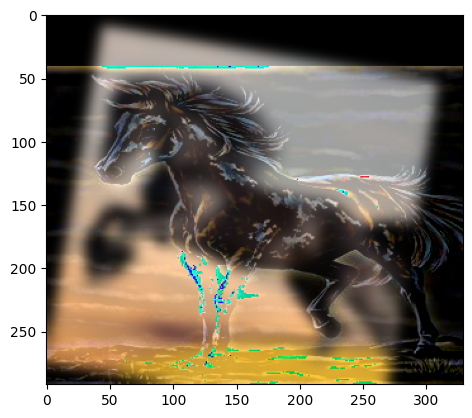

In [35]:
plt.imshow((high_pass_im2_uint8 + low_pass_im1_uint8)[:, :, [2,1,0]]) 


Bells & Whistles 2.

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def build_gaussian_pyramid(image, levels):

    ksize = int(np.ceil(5)*6+1)
    fil = cv2.getGaussianKernel(ksize, 5)
    kernel_low = fil*np.transpose(fil)
    gaussian_pyramid = [image]

    for i in range(levels - 1):
        image = cv2.filter2D(image, -1, kernel_low)
        image = cv2.pyrDown(image)
        gaussian_pyramid.append(image)
    return gaussian_pyramid

def build_laplacian_pyramid(image, levels):

    ksize2 = int(np.ceil(50)*6+1)
    fil2 = cv2.getGaussianKernel(ksize2, sigma_high) 
    kernel_high = fil2*np.transpose(fil2) 
    laplacian_pyramid = []
    for i in range(levels - 1):
        image = image - cv2.filter2D(image, -1, kernel_high)
        laplacian_pyramid.append(image)
        image = cv2.pyrDown(image)
    return laplacian_pyramid

In [37]:
gaussian_pyramid = build_gaussian_pyramid(main_hybrid,5)


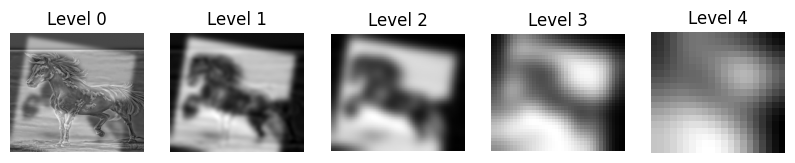

In [38]:
# Plot the Gaussian pyramid
plt.figure(figsize=(10, 8))

for i in range(len(gaussian_pyramid)):
    plt.subplot(1, len(gaussian_pyramid), i+1)
    plt.imshow(gaussian_pyramid[i], cmap="gray" )
    plt.title(f'Level {i}')
    plt.axis('off')  # Hide axis

plt.show()

In [39]:
laplacian_pyramid = build_laplacian_pyramid(main_hybrid,5)

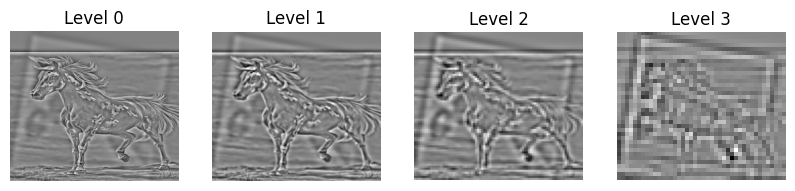

In [40]:
plt.figure(figsize=(10, 8))

for i in range(len(laplacian_pyramid)):
    plt.subplot(1, len(laplacian_pyramid), i+1)
    plt.imshow(laplacian_pyramid[i],  cmap="gray")
    plt.title(f'Level {i}')
    plt.axis('off')  # Hide axis

plt.show()